<img align="left" src="../GW-python-logo-v1.png" alt="GW Python Logo" title="GW Python Logo" width="200" height="198" />

# GW:[Python Intro to Machine Learning]

## Learning Python through projects: Learn the basics of machine learning by looking data from the Titanic.

Based on: https://blog.patricktriest.com/titanic-machine-learning-in-python/   and https://humansofdata.atlan.com/2016/07/machine-learning-python/

This tutorial is intended to be an accessible introduction on how to use machine learning techniques for your projects and data sets, regardless of your major or disipline. 

For our introduction, we will use a dataset with passengers of the RMS Titanic. We will use an open data set with data on the passengers aboard the infamous doomed sea voyage of 1912. By examining factors such as class, sex, and age, we will experiment with different machine learning algorithms and build a program that can predict whether a given passenger would have survived this disaster.

To get started, we have to first import a few important libraries that will help us along the way. 

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
import numpy as np
import pandas as pd
from sklearn import datasets, svm, tree, preprocessing, metrics
from sklearn.model_selection import cross_validate
import sklearn.ensemble as ske
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score


Now that we have the Jupyter Notebook environment set up, we have to get the Titanic dataset. It is already included in the Jupyter folder where this Notebook is located, and if you want a copy you can also get it here: http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.xls.

In [89]:
titanic_df = pd.read_excel('./titanic3.xls', 'titanic3', index_col=None, na_values=['NA'])

Let's check out to see what is in the file by taking a look at the head().

In [90]:
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


The column heading variables have the following meanings:

survival: Survival (0 = no; 1 = yes)
class: Passenger class (1 = first; 2 = second; 3 = third)
name: Name
sex: Sex
age: Age
sibsp: Number of siblings/spouses aboard
parch: Number of parents/children aboard
ticket: Ticket number
fare: Passenger fare
cabin: Cabin
embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
boat: Lifeboat (if survived)
body: Body number (if did not survive and body was recovered)


We can now us pandas to look at some characteristics of the data. For instance, the percentage of those who survived.  (i.e., 0 = no; 1 = yes)

In [91]:
titanic_df['survived'].mean()

0.3819709702062643

The calculation shows that only 38% of the passengers survived. Not the best odds. The reason for this massive loss of life is that the Titanic was only carrying 20 lifeboats, which was not nearly enough for the 1,317 passengers and 885 crew members aboard. It seems unlikely that all of the passengers would have had equal chances at survival, so we will continue breaking down the data to examine the social dynamics that determined who got a place on a lifeboat and who did not.

For example, you can look to see what percentage survived based on the "passenger class" (1 = first; 2 = second; 3 = third)(i.e., first class, second class, etc.)

In [92]:
titanic_df.groupby('pclass').mean()

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


We can start drawing some interesting insights from this data. For instance, passengers in first class had a 62% chance of survival, compared to a 25.5% chance for those in 3rd class. Additionally, the lower classes generally consisted of younger people, and the ticket prices for first class were predictably much higher than those for second and third class. The average ticket price for first class (£87.5) is equivalent to $13,487 in 2016.

We can go a step further to look at the data by passenger class and gender (i.e., sex).

In [93]:
class_sex_grouping = titanic_df.groupby(['pclass','sex']).mean()
class_sex_grouping

survived        age     sibsp     parch        fare        body
pclass sex                                                                    
1      female  0.965278  37.037594  0.555556  0.472222  109.412385         NaN
       male    0.340782  41.029250  0.340782  0.279330   69.888385  162.828571
2      female  0.886792  27.499191  0.500000  0.650943   23.234827   52.000000
       male    0.146199  30.815401  0.327485  0.192982   19.904946  171.233333
3      female  0.490741  22.185307  0.791667  0.731481   15.324250  183.000000
       male    0.152130  25.962273  0.470588  0.255578   12.415462  151.854167

We can also plot this data on a chart using matplotlib (which we imported above).

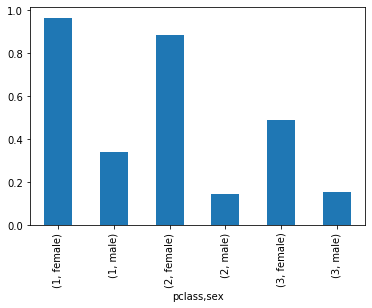

In [94]:
class_sex_grouping['survived'].plot.bar()

The effectiveness of the second part of this “Women and children first” policy can be deduced by breaking down the survival rate by age.

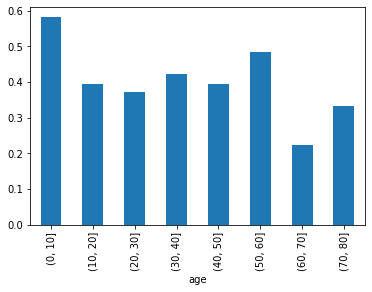

In [95]:
group_by_age = pd.cut(titanic_df["age"], np.arange(0, 90, 10))
age_grouping = titanic_df.groupby(group_by_age).mean()
age_grouping['survived'].plot.bar()

With analysis above, we can draw some fairly straightforward conclusions from this data — being a woman, being in 1st class, and being a child were all factors that could boost your chances of survival during this disaster.

Now that we have gotten to know our data a little, let's focus on what machine learning can do for us in this case where we are trying to understand a historical event in new ways.  Let’s say we wanted to predict whether a given passenger would survive the disaster. This is where machine learning comes in: we will build a program that learns from the sample data to predict whether a given passenger would survive.

This concept of training the program based on a subset of data (i.e., training data) from our total dataset is essential to machine learning. We will take a randomly-selected subset of data (e.g., 80% of the total for example) that will be used to train the  program, and then use the results of that training to test how well the program predicts the correct results using the remainder of the data (i.e., testing data).

Before we can feed our data set into a machine learning algorithm, however, we have to remove missing values and split it into training and test sets.

If we perform a count of each column, we will see that much of the data on certain fields is missing. Most machine learning algorithms will have a difficult time handling missing values, so we will need to make sure that each row has a value for each column.

In [96]:
titanic_df.count()

pclass       1309
survived     1309
name         1309
sex          1309
age          1046
sibsp        1309
parch        1309
ticket       1309
fare         1308
cabin         295
embarked     1307
boat          486
body          121
home.dest     745
dtype: int64

Most of the rows are missing values for “boat” and “cabin”, so we will remove these columns from the data frame. 

In [97]:
titanic_df = titanic_df.drop(['body','cabin','boat'], axis=1)

A large number of rows are also missing the “home.dest” field; here we could fill the missing values with “NA”. But, like “name” and “ticket”, the “home.dest” column consist of non-categorical string values (in other words, most rows have a distinct string; such as the unique name of the passenger). These are difficult to use in a classification algorithm, so we will drop them from the data set.

In [98]:
titanic_df = titanic_df.drop(['name','ticket','home.dest'],axis=1)

A significant number of rows are also missing an age value. We have seen above that age could have a significant effect on survival chances, so we will have to drop all of rows that are missing an age value.

In [99]:
titanic_df = titanic_df.dropna()

 When we run the count command again, we can see that all remaining columns now contain the same number of values. You can give it a try below, do you remember how to get the count function?

Did you get this:

pclass       1043
survived     1043
name         1043
sex          1043
age          1043
sibsp        1043
parch        1043
ticket       1043
fare         1043
embarked     1043
home.dest    1043
dtype: int64

If you couldn't remember how to get the above data, look up to earlier steps.  If you can still can find it, highlight the blank area below with your mouse.

titanic_df.count()

With a little more wrangling of the data we will be ready to go.

The “sex” and “embarked” fields are both string values that correspond to categories (i.e “Male” and “Female”) so we will run each through a preprocessor. This preprocessor will convert these strings into integer keys, making it easier for the classification algorithms to find patterns. For instance, “Female” and “Male” will be converted to 0 and 1 respectively.

In [100]:
def preprocess_titanic_df(df):
    processed_df = df.copy()
    le = preprocessing.LabelEncoder()
    processed_df.sex = le.fit_transform(processed_df.sex)
    processed_df.embarked = le.fit_transform(processed_df.embarked)
    return processed_df

You can see that we used the preprocessing tools for the sklearn library that we imported at the beginning. Within the library are tools for encoding labels (e.g., sex, embarked) into integer values (e.g., 0 or 1).

We can now use the function we just defined above in order to preprocess the titanic_df we cleaned up above.

In [101]:
processed_df = preprocess_titanic_df(titanic_df)

Next, we separate the data set into two arrays: “X” containing all of the values for each row besides “survived”, and “y” containing only the “survived” value for that row. In other words, "X" is an array with all the variables that we want to predict the outcome of "y" (or survival). The classification algorithms will compare the attribute values of “X” to the corresponding values of “y” to detect patterns in how different attributes values tend to affect the survival of a passenger. If you have taken a course in regression analysis, this may look familiar.


In [102]:
X = processed_df.drop(['survived'], axis=1).values
y = processed_df['survived'].values

Finally, we break the “X” and “y” array into two parts each — a training set and a testing set. We will feed the training set into the classification algorithm to form a trained model. Once the model is formed, we will use it to classify the testing set, allowing us to determine the accuracy of the model. Here we have made a 20/80 split, such that 80% of the dataset will be used for training and 20% will be used for testing.

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

With our data cleaned and sorted into training data (80%) and testing data (20%), we are now ready to get started with the machine learning.

We will start off with a simple decision tree classifier. A decision tree examines one variable at a time and splits into one of two branches based on the result of that value, at which point it does the same for the next variable. 

This is what a trained decision tree for the Titanic dataset looks like if we set the maximum number of levels to 3:

INSERT IMAGE

The tree first splits by sex, and then by class, since it has learned during the training phase that these are the two most important features for determining survival. The dark blue boxes indicate passengers who are likely to survive, and the dark orange boxes represent passengers who are almost certainly doomed. Interestingly, after splitting by class, the main deciding factor determining the survival of women is the ticket fare that they paid, while the deciding factor for men is their age (with children being much more likely to survive).

To create this tree, we first initialize an instance of an untrained decision tree classifier. (Here we will set the maximum depth of the tree to 10). Next we “fit” this classifier to our training set, enabling it to learn about how different factors affect the survivability of a passenger. Now that the decision tree is ready, we can “score” it using our test data to determine how accurate it is.


In [104]:
clf_dt = tree.DecisionTreeClassifier(max_depth=10)

Next we “fit” this classifier to our training set, enabling it to learn about how different factors affect the survivability of a passenger. Now that the decision tree is ready, we can “score” it using our test data to determine how accurate it is when it is applied to the test data (the 20% of the data we pulled out from the total for this purpose).

In [105]:
clf_dt.fit (X_train, y_train)
clf_dt.score (X_test, y_test)

0.7751196172248804

The resulting reading, 0.7464, means that the model correctly predicted the survival of 75% of the test set. Not bad for our first model, and a fairly simple model at that. 

Before we do however, you might be thinking that the accuracy of the model could vary depending on which rows were selected for the training (80%) and test (20%) data sets. We will get around this problem by using a shuffle validator.  This will randomly split the data 20 times, in the example below, with 20% of the data going into the test data set. 

In [106]:
shuffle_validator = ShuffleSplit(n_splits=20, train_size=0.2, test_size=.2, random_state=0)


By passing this shuffle validator as a parameter to the “cross_val_score” function, we can score our classifier against each of the different splits, and compute the average accuracy and standard deviation from the results. 

In [107]:
def test_classifier(clf):
    scores = cross_val_score(clf, X, y, cv=shuffle_validator)
    print("Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std()))

If we test our decision tree model (from above, clf_dt) we can see that doing the split 20 times, on average our accuracy was 76% (with a standard deliviation of .03, that is that majority of the interations were between 79% and 73%).

In [108]:
test_classifier(clf_dt)

Accuracy: 0.7297 (+/- 0.03)


Wonderful. We now have our first model, and we used it 20 times with different training and testing data sets (pulled randomly from the full data set), and it does pretty good. But we can do better!  And we have a function that we can use to test our different models using similar procedures.

The next classifier model we want to test is a Random Forest classification algorithm.  Unlike a Decision Tree, the “Random Forest” classification algorithm will create a multitude of (generally very poor) trees for the data set using different random subsets of the input variables, and will return whichever prediction was returned by the most trees. This helps to avoid “overfitting”, a problem that occurs when a model is so tightly fitted to arbitrary correlations in the training data that it performs poorly on test data.

In [109]:
clf_rf = ske.RandomForestClassifier(n_estimators=50)
test_classifier(clf_rf)

Accuracy: 0.7682 (+/- 0.02)


Next we will try Gradient Boosting classification algorithm. The “Gradient Boosting” classification algorithm will generate many weak, shallow prediction trees and will combine, or “boost”, them into a strong model. This model performs very well on our data set, but has the drawback of being relatively slow and difficult to optimize, as the model construction happens sequentially so it cannot be parallelized.

In [110]:
clf_gb = ske.GradientBoostingClassifier(n_estimators=50)
test_classifier(clf_gb)

Accuracy: 0.7804 (+/- 0.03)


There are many (many) classification algorithms, but let's try one more. Voting classification algorithm can be used to apply multiple conceptually divergent classification models to the same data set and will return the majority vote from all of the classifiers. For instance, if the gradient boosting classifier predicts that a passenger will not survive, but the decision tree and random forest classifiers predict that they will live, the voting classifier will chose the latter. So we basically put our three previous algorithms into the new algorithm, and it uses the best of them.

In [111]:
eclf = ske.VotingClassifier([('dt', clf_dt), ('rf', clf_rf), ('gb', clf_gb)])
test_classifier(eclf)

Accuracy: 0.7746 (+/- 0.02)


You have probably also heard about Deep Neural Networks (DNN) as a tool used in machine learning, especially for classifying pictures or words. DNNs are exciting advancements in machine learning, but they are overkill for a small data set like out Titanic example.  If you are curious, here is a tutorial where someone used a DNN, and as you will see at the end its accuracy was only about 70% (again, not enough data to fully train a useful DNN model): https://www.kaggle.com/tabora/titanic-tensorflow-canned-estimators-beginners

The limited amount of data is also a limitation on the accuracy in our models above (e.g., decision tree, random forest, etc.). 

Given that the accuracy for all of our models is maxing out around 80%, it will be interesting to look at specific passengers for whom these classification algorithms are incorrect.

First we have to prepare the test data set of the first 20 listed passengers for each class. We do this by taking the first 20 rows and then mergining those into a new data set (testing_set).

In [112]:
passengers_set_1 = titanic_df[titanic_df.pclass == 1].iloc[:20,:].copy()
passengers_set_2 = titanic_df[titanic_df.pclass == 2].iloc[:20,:].copy()
passengers_set_3 = titanic_df[titanic_df.pclass == 3].iloc[:20,:].copy()
passenger_set = pd.concat([passengers_set_1,passengers_set_2,passengers_set_3])
testing_set = preprocess_titanic_df(passenger_set)

We then create a training data set using all those who are not in the testing set. And then we prepare the data as before based on the "X" factors we want to train in order to predict the outcome "y".

In [113]:
training_set = pd.concat([titanic_df, passenger_set]).drop_duplicates(keep=False)
training_set = preprocess_titanic_df(training_set)

X_train2 = training_set.drop(['survived'], axis=1).values
y_train2 = training_set['survived'].values
X_test2 = testing_set.drop(['survived'], axis=1).values
y_test2 = testing_set['survived'].values


Now we can run our best performing model from above these new data sets.

In [114]:
eclf.fit (X_train2, y_train2)
eclf.score (X_test2, y_test2)

0.8166666666666667

It performs pretty well statistically, but let's see how that looks when it comes to which passengers did it predict correctly.  To do this we predict survived (or not survived) for the testing data set, and list all those passengers for whom the their survival (1 or 0) was not as predicted.

In [115]:
prediction = eclf.predict(X_test2)
passenger_set[passenger_set.survived != prediction]

,pclass,survived,sex,age,sibsp,parch,fare,embarked
2,1,0,female,2.0,1,2,151.5500,S
4,1,0,female,25.0,1,2,151.5500,S
5,1,1,male,48.0,0,0,26.5500,S
14,1,1,male,80.0,0,0,30.0000,S
20,1,1,male,37.0,1,1,52.5542,S
336,2,1,male,32.0,1,0,26.0000,S
601,3,0,male,13.0,0,2,20.2500,S
603,3,1,female,35.0,1,1,20.2500,S
605,3,1,male,25.0,0,0,7.6500,S
606,3,1,male,20.0,0,0,7.9250,S


The above table shows all of the passengers in our test data set whose survival (or lack thereof) was incorrectly classified by the model. 

Sometimes when you are dealing the data sets like this, the human side of the story can get lost beneath the complicated math and statistical analysis. By examining passengers for whom our classification model was incorrect, we can begin to uncover some of the most fascinating, and sometimes tragic, stories of humans defying the odds.

For instance, the first two incorrectly classified passengers are all members of the Allison family (passengers in rows 2 and 4 from the initial dataframe), who perished even though the model predicted that they would survive. These first class passengers were very wealthy, as can be evidenced by their far-above-average ticket prices. For Betsy (age 25) and Loraine (age 2) in particular, not surviving is very surprising, considering that we found earlier that over 96% of first class women lived through the disaster. (note, we have taken the 'names' column out of the dataframe in order to do the machine learning, so we are matching names based on the row numbers).

So what happened? A surprising amount of information on each Titanic passenger is available online; it turns out that the Allison family was unable to find their youngest son Trevor and was unwilling to evacuate the ship without him. Tragically, Trevor was already safe in a lifeboat with his nurse and was the only member of the Allison family to survive the sinking.

As you can see, machine learning gives us tools for asking interesting questions about the data we have.

Initially you may disappointed by the accuracy of our machine learning models maxing out at about 80% for this data set. It’s easy to forget that these data points each represent real people, each of whom found themselves stuck on a sinking ship without enough lifeboats. When we looked into data points for which our model was wrong, we can uncover incredible stories of human nature driving people to defy their logical fate. It is important to never lose sight of the human element when analyzing this type of data set. This principle will be especially important going forward, as machine learning is increasingly applied to human data sets by organizations such as insurance companies, big banks, and law enforcement agencies.
